<a href="https://colab.research.google.com/github/ibonetc/Data_Analytics/blob/main/IA_DA_WebScraping_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web scraping de imágenes en google, a partir de una búsqueda con palabras claves

In [7]:
!pip install selenium
!pip install boto3

In [8]:
!apt-get update
!apt install chromium-chromedriver

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 338 kB in 3s (119 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
chromium-chromedriver is already the newest version (1:85.0.4183.83-0ubuntu2.22

In [9]:
!pip install webdriver_manager

In [10]:
import os, sys, time
import json, requests, shutil
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

from PIL import Image
import hashlib
import urllib
from binascii import a2b_base64
import matplotlib.pyplot as plt
import io
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager

In [11]:
def scraping(searchtext,download_path, num_requested=1000):
  number_of_scrolls = num_requested / 400 + 1 # En cada scroll se pueden descargar 400 imágenes
  download_path=download_path + searchtext.replace(" ", "_")
  if not os.path.exists(download_path + searchtext.replace(" ", "_")):
    os.makedirs(download_path + searchtext.replace(" ", "_"))

  url = f'https://www.google.co.in/search?q={searchtext}&source=lnms&tbm=isch'

  #driver = webdriver.Chrome('D:/Install/chromedriver.exe')
  #Opción en colab


  chrome_options = webdriver.ChromeOptions()

  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  driver =webdriver.Chrome(options=chrome_options)
  ########################################################################
  #driver = webdriver.Firefox()

  driver.get(url)

  headers = {}
  img_count = 0
  downloaded_img_count = 0

  for _ in range(int(number_of_scrolls)):
    for __ in range(10): # Varios scrolls internos para mostrar las 400 imágenes de uno.
      driver.execute_script("window.scrollBy(0, 1000000)")
      time.sleep(0.2)
    time.sleep(0.5) # descargar las próximas 400 imágenes
  #sub = driver.find_elements_by_tag_name('img')
  sub = driver.find_elements(By.TAG_NAME, 'img')
  listImages = []
  for image in sub:
    if image.get_attribute('src')!=None:
      listImages.append(image.get_attribute('src'))
  driver.quit()
  return listImages

In [12]:
searchtext='Isis Bonet Cruz'
num_requested=4000
download_path='/content/drive/MyDrive/FotosGoogle'

In [13]:
lista=scraping(searchtext,download_path=download_path)

['https://www.gstatic.com/ui/v1/menu/light_thumbnail2.png',
 'https://www.gstatic.com/ui/v1/menu/dark_thumbnail2.png',
 'https://www.gstatic.com/ui/v1/menu/device_default_thumbnail2.png',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQwZy7rK6tWAsB5Qc29bRFirAIIupY2SzXkZyMTiLQwS-s1vRj7zj5quhDxvUrIaWD_QM&usqp=CAU',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn2.gstatic.com/faviconV2?url=https://gobiernodigital.gov.co&client=VFE&size=16&type=FAVICON&fallback_opts=TYPE,SIZE,URL&nfrp=2',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT0E-dxg5oCM0XXUGcjtXAtvR5ASviz-2rd3B-jIVB8BR6iKd3deL_yrQQHQ-prbHsssUo&usqp=CAU',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBnveyTDlyL0B6z8GWhfBj8893C7GcaAZyf5oVSz-knNA0zyfBks72YCRpG_E79EmL3Es&usqp=CAU',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9G
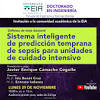
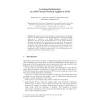
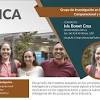
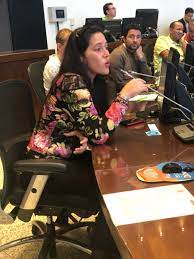
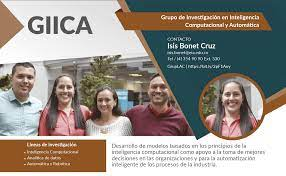
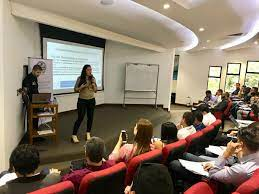
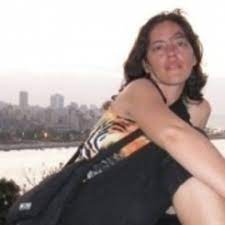
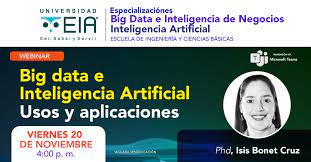
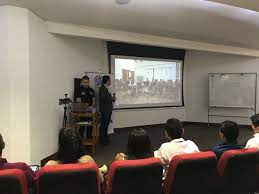
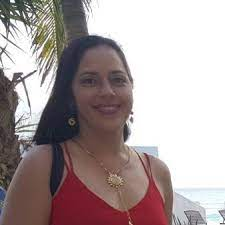
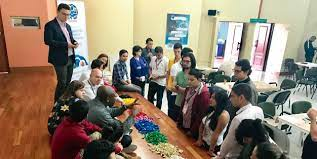
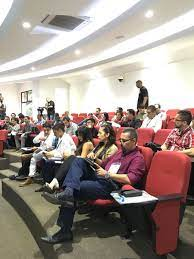
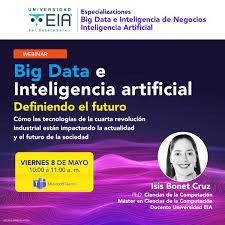
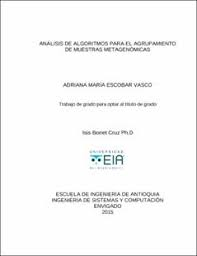
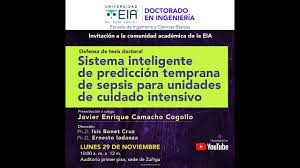
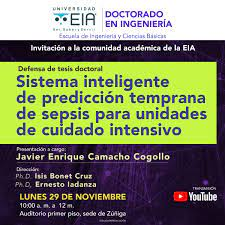
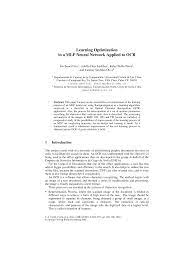
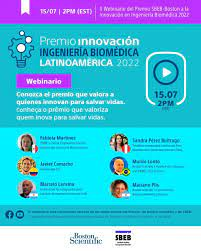
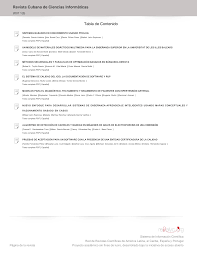
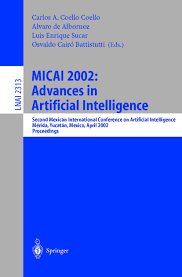

In [14]:
lista

# Reconocimiento de rostro en url de imágenes encontradas

In [ ]:
!mkdir -p ~/.aws &&\
  cp /content/drive/My\ Drive/AWS/credencials.txt ~/.aws/credentials

In [ ]:
import boto3
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
face = '/content/drive/MyDrive/DatasetRecognition/Isis.jpg'

In [ ]:
client = boto3.client(service_name='rekognition', region_name="us-east-2")

# **Termine comparando todas las imágenes contra la suya**